In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4.5)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
import xgboost as xgb

C:\Users\bchou\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
# drop all non_numericals and year except for province
data = pd.read_csv("OutliersRemoved2.csv")
data = data.drop(data.columns[[0,1,3,4,5,6]],axis = 1)

# imputation by subbing with mean on copy of data
data = data.dropna(thresh = 5000, axis = 'columns')
data = data.dropna(how = 'any', thresh = 40)

df_og = data.fillna(data.mean())

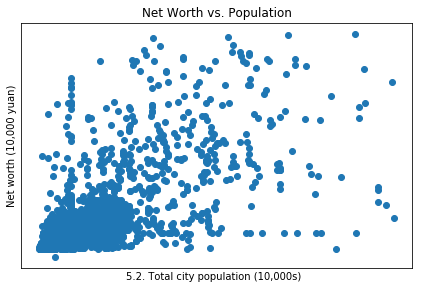

In [21]:
plt.ylabel('Net worth (10,000 yuan)')
plt.xlabel("5.2. Total city population (10,000s)  ")
plt.title('Net Worth vs. Population')
plt.xticks(())
plt.yticks(())
plt.scatter(df_og["5.2. Total city population (10,000s)"],df_og['20.2. Net worth (10,000 yuan)'])


In [22]:
print("Less water, lower net worth")

Less water, lower net worth


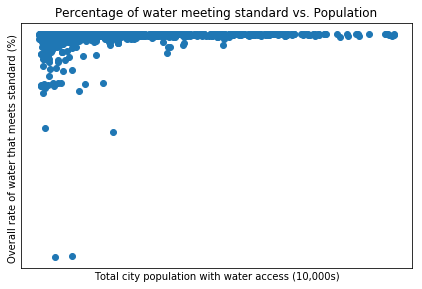

In [23]:
plt.ylabel("Overall rate of water that meets standard (%)  ")
plt.xlabel('Total city population with water access (10,000s)')
plt.title('Percentage of water meeting standard vs. Population')
plt.xticks(())
plt.yticks(())
plt.scatter(df_og['5.3. Total city population with water access (10,000s)'],df_og["14.1. Overall rate of water that meets standard (%)"])


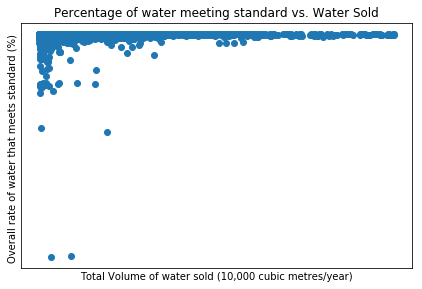

In [24]:
plt.ylabel("Overall rate of water that meets standard (%)  ")
plt.xlabel("Total Volume of water sold (10,000 cubic metres/year)")
plt.title('Percentage of water meeting standard vs. Water Sold')
plt.xticks(())
plt.yticks(())
plt.scatter(df_og["3.1. Total Volume of water sold (10,000 cubic metres/year)"],df_og["14.1. Overall rate of water that meets standard (%)"])



In [25]:
print("Less acceptable water for cities with less population and water sold")

Less acceptable water for cities with less population and water sold


In [30]:
# shuffle
def create_frame(d):
    df = pd.DataFrame.copy(d)
    df = shuffle(df)
    return df

In [31]:
df1 = create_frame(df_og)

In [32]:
print("without categorization, testing for Province\n")
X = df1
X = X.drop('Province', axis = 1)
Y = df1['Province']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

without categorization, testing for Province



In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print("logistic regression training accuracy: ",logreg.score(X_train,Y_train))
print("logistic regression testing accuracy: ",logreg.score(X_test,Y_test) )

logistic regression training accuracy:  0.396547859224
logistic regression testing accuracy:  0.361675126904


In [34]:
svc = SVC()
svc.fit(X_train, Y_train)
print("SVM training accuracy: ",svc.score(X_train, Y_train))
print("SVM testing accuracy: ",svc.score(X_test,Y_test) )

SVM training accuracy:  1.0
SVM testing accuracy:  0.0850253807107


In [35]:
perceptron = Perceptron(max_iter = 1000, tol = None)
perceptron.fit(X_train, Y_train)
print("Perceptron training accuracy: ",perceptron.score(X_train, Y_train))
print("Perceptron testing accuracy: ",perceptron.score(X_test,Y_test) )

Perceptron training accuracy:  0.199058507061
Perceptron testing accuracy:  0.177664974619


In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
print("KNN training accuracy: ",knn.score(X_train, Y_train))
print("KNN testing accuracy: ",knn.score(X_test,Y_test) )

KNN training accuracy:  0.57969065232
KNN testing accuracy:  0.274111675127


In [37]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, Y_train)
print("random forest training accuracy: ",random_forest.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest.score(X_test,Y_test) )

random forest training accuracy:  1.0
random forest testing accuracy:  0.883248730964


In [38]:
gradboost = xgb.XGBClassifier(n_estimators=1000)
gradboost.fit(X_train, Y_train)
Y_pred = gradboost.predict(X_test)
acc_perceptron = round(gradboost.score(X_train, Y_train) * 100, 2)
print("xgboost training accuracy: ",round(gradboost.score(X_train, Y_train), 4))
print("xgboost testing accuracy: ",round(gradboost.score(X_test, Y_test), 4))

xgboost training accuracy:  1.0
xgboost testing accuracy:  0.8769


In [39]:
# categorize all columns except for province and year for the second run
df2 = create_frame(df_og)
for i in list(df2):
    if(i != 'Province' and i != 'Year'):
        buckets = [str(i) for i in range(10)]
        classes = pd.cut(df2[i],10,labels=buckets)
        df2[i]  = classes.map({'0': 0, '1':1,'2': 2,'3':3,'4' :4,'5' :5,'6' :6,'7' :7,'8' :8,'9' :9})


In [40]:
print("with categorization\n")
X2 = df2
X2 = X2.drop('Province', axis =1)
Y2 = df2['Province']
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.15)

with categorization



In [41]:
logreg2 = LogisticRegression()
logreg2.fit(X2_train, Y2_train)
print("logisitic regression training accuracy: ",logreg2.score(X2_train,Y2_train))
print("logisitic regression testing accuracy: ",logreg2.score(X2_test,Y2_test) )

logisitic regression training accuracy:  0.435328401704
logisitic regression testing accuracy:  0.39847715736


In [42]:
svc2 = SVC()
svc2.fit(X2_train, Y2_train)
print("SVM training accuracy: ",svc2.score(X2_train, Y2_train))
print("SVM testing accuracy: ",svc2.score(X2_test,Y2_test) )

SVM training accuracy:  0.581483972204
SVM testing accuracy:  0.468274111675


In [43]:
perceptron2 = Perceptron(max_iter = 2000, tol = None)
perceptron2.fit(X2_train, Y2_train)
print("Perceptron training accuracy: ",perceptron2.score(X2_train, Y2_train))
print("Perceptron testing accuracy: ",perceptron2.score(X2_test,Y2_test) )

Perceptron training accuracy:  0.242994844205
Perceptron testing accuracy:  0.195431472081


In [44]:
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X2_train, Y2_train)
print("KNN training accuracy: ",knn2.score(X2_train, Y2_train))
print("KNN testing accuracy: ",knn2.score(X2_test,Y2_test) )

KNN training accuracy:  0.763730105358
KNN testing accuracy:  0.529187817259


In [45]:
random_forest2 = RandomForestClassifier(n_estimators=1000)
random_forest2.fit(X2_train, Y2_train)
print("random forest training accuracy: ",random_forest2.score(X2_train, Y2_train))
print("random forest testing accuracy: ",random_forest2.score(X2_test,Y2_test) )

random forest training accuracy:  0.982515131137
random forest testing accuracy:  0.633248730964


In [46]:
gradboost2 = xgb.XGBClassifier(n_estimators=1000)
gradboost2.fit(X2_train, Y2_train)
Y_pred2 = gradboost2.predict(X2_test)
print("xgboost training accuracy: ",round(gradboost2.score(X2_train, Y2_train), 4))
print("xgboost testing accuracy: ",round(gradboost2.score(X2_test, Y2_test), 4))

xgboost training accuracy:  0.8926
xgboost testing accuracy:  0.6117


In [55]:
print("df1 (without categorization) random forest holds the greatest accuracy")

df1 (without categorization) random forest holds the greatest accuracy


In [48]:
def plot_model_var_imp( model , X , Y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[:10].plot( kind = 'barh' )
    print (model.score( X , Y ))

train importances for xgboost without categorization
1.0


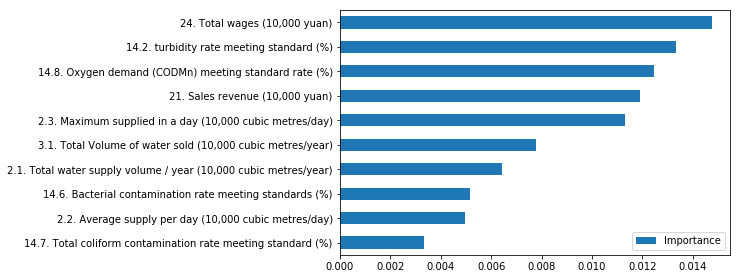

In [49]:
# Since xgboost and random forest had high accuracies, let's check their importance charts

# do one for xgboost, then compare similar results


print("train importances for xgboost without categorization")
plot_model_var_imp(gradboost, X_train, Y_train)

train importances for random forest without categorization
1.0


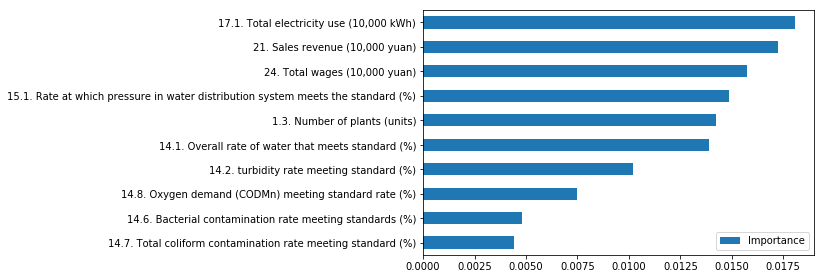

In [57]:
print("train importances for random forest without categorization")
plot_model_var_imp(random_forest, X_train, Y_train)

In [51]:
print("tune random forest using GridSearchCV")
from sklearn.model_selection import GridSearchCV
print(random_forest.get_params())


tune random forest using GridSearchCV
{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [52]:
#function to plot parameter CV scores
def plot_params(param, num_range, index, classifier):
    grid_search = GridSearchCV(classifier, param_grid = {param: num_range})
    grid_search.fit(X_train, Y_train)
    
    df = {}
    results = grid_search.cv_results_
    for i,score in enumerate(results['params']):
        df[score[param]] = results['mean_test_score'][i]

    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(param)
    print(grid_search.best_params_)
    return plot, df
    

In [60]:
#param values to test: n_estimators, max_features and min_sample_leaf
param_vals = {"n_estimators": np.arange(1, 500, 20),"max_features": np.arange(1, 46, 1)}
              

{'n_estimators': 401}
{'max_features': 10}


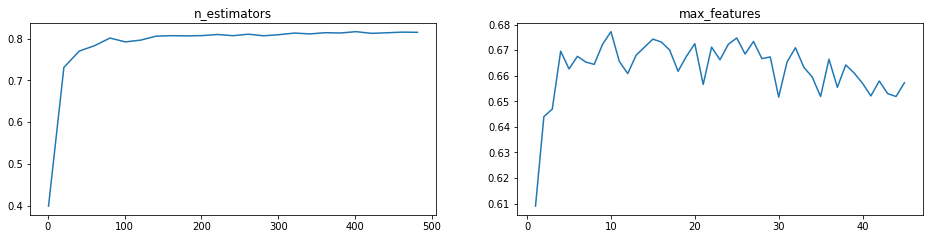

In [61]:
RF = RandomForestClassifier()
index = 1
plt.figure(figsize=(16,12))
for param, param_range in dict.items(param_vals):   
    plot_params(param, param_range, index, RF)
    index += 1

In [63]:
random_forest3 = RandomForestClassifier(n_estimators=401, max_features = 10)
random_forest3.fit(X_train, Y_train)
print("random forest training accuracy: ",random_forest3.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest3.score(X_test,Y_test) )
# no difference in tuning, general conclusion is to use more n_estimators and default max_features

random forest training accuracy:  1.0
random forest testing accuracy:  0.878172588832


In [64]:
random_forest4 = RandomForestClassifier(n_estimators=2000)
random_forest4.fit(X_train, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
print("random forest training accuracy: ",random_forest4.score(X_train, Y_train))
print("random forest testing accuracy: ",random_forest4.score(X_test,Y_test) )

random forest training accuracy:  1.0
random forest testing accuracy:  0.879441624365
